In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/ #

In [3]:
df = pd.read_csv('/content/application_record.csv') #leitura do arquivo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135512 entries, 0 to 135511
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   135512 non-null  int64  
 1   CODE_GENDER          135512 non-null  object 
 2   FLAG_OWN_CAR         135512 non-null  object 
 3   FLAG_OWN_REALTY      135512 non-null  object 
 4   CNT_CHILDREN         135512 non-null  int64  
 5   AMT_INCOME_TOTAL     135512 non-null  float64
 6   NAME_INCOME_TYPE     135512 non-null  object 
 7   NAME_EDUCATION_TYPE  135512 non-null  object 
 8   NAME_FAMILY_STATUS   135512 non-null  object 
 9   NAME_HOUSING_TYPE    135512 non-null  object 
 10  DAYS_BIRTH           135512 non-null  int64  
 11  DAYS_EMPLOYED        135511 non-null  float64
 12  FLAG_MOBIL           135511 non-null  float64
 13  FLAG_WORK_PHONE      135511 non-null  float64
 14  FLAG_PHONE           135511 non-null  float64
 15  FLAG_EMAIL       

**ID:** Client number

**CODE_GENDER:**	Gender

**FLAG_OWN_CAR:**	Is there a car

**FLAG_OWN_REALTY:**	Is there a property

**CNT_CHILDREN:**	Number of children

**AMT_INCOME_TOTAL:**	Annual income

**NAME_INCOME_TYPE:**	Income category

**NAME_EDUCATION_TYPE:** Education level

**NAME_FAMILY_STATUS:**	Marital status
**NAME_HOUSING_TYPE:**	Way of living

**DAYS_BIRTH:**	Birthday - Count backwards from current day (0), -1 means yesterday

**DAYS_EMPLOYED** Start date of employment - Count backwards from current day(0). If positive, it means the person currently unemployed.

**FLAG_MOBIL**	Is there a mobile phone

**FLAG_WORK_PHONE**	Is there a work phone

**FLAG_PHONE**	Is there a phone

**FLAG_EMAIL**	Is there an email

**OCCUPATION_TYPE**	Occupation

**CNT_FAM_MEMBERS**	Family size


In [6]:
df.head() #primeiras linhas

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [8]:
df.describe() #estatísticas

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,1.355120e+05,135512.000000,1.355120e+05,135512.000000,135511.000000,135511.0,135511.000000,135511.000000,135511.000000,135511.000000
mean,5.431871e+06,0.431534,1.852608e+05,-16045.928198,63390.169639,1.0,0.217709,0.300802,0.085351,2.200847
std,3.950082e+05,0.736666,1.027087e+05,4210.764290,141151.255247,0.0,0.412690,0.458609,0.279404,0.908501
min,5.008804e+06,0.000000,2.700000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.143407e+06,0.000000,1.170000e+05,-19564.000000,-3051.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.346116e+06,0.000000,1.575000e+05,-15609.000000,-1461.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.549350e+06,1.000000,2.250000e+05,-12555.000000,-345.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,6.840318e+06,19.000000,3.825000e+06,-2.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [9]:
df.shape #tamanho do dataframe

(135512, 18)

In [10]:
df.columns #colunas

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [11]:
df.isnull().sum() #verificando valores nulos

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              1
FLAG_MOBIL                 1
FLAG_WORK_PHONE            1
FLAG_PHONE                 1
FLAG_EMAIL                 1
OCCUPATION_TYPE        42322
CNT_FAM_MEMBERS            1
dtype: int64

In [12]:
df.dropna(inplace=True) #removendo valores nulos

In [13]:
df.isnull().sum() #verificando valores nulos de novo

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [14]:
df.dtypes #tipo de dados

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [30]:
df['OCCUPATION_TYPE'].value_counts() #tipos de trabalho

OCCUPATION_TYPE
Laborers                 23408
Core staff               13205
Sales staff              13101
Managers                 10804
Drivers                   8006
High skill tech staff     5300
Accountants               4720
Medicine staff            4031
Security staff            2510
Cooking staff             2457
Cleaning staff            1975
Private service staff     1112
Secretaries                659
Low-skill Laborers         603
Waiters/barmen staff       546
Realty agents              312
HR staff                   228
IT staff                   213
Name: count, dtype: int64

In [23]:
contagem_genero = df['CODE_GENDER'].value_counts() #contagem de genêro

<Axes: xlabel='CODE_GENDER'>

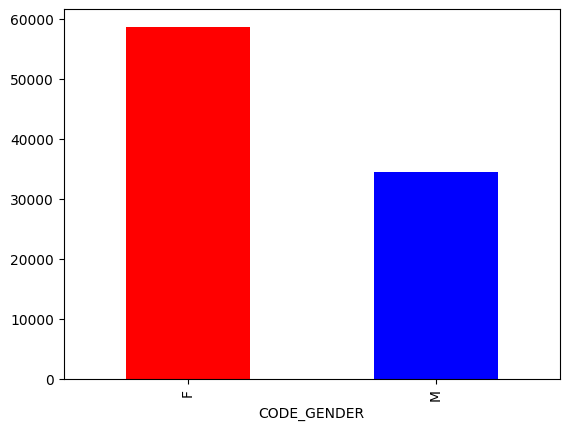

In [32]:
contagem_genero.plot(kind='bar', color=['red', 'blue']) #gráfico do gênero

`** A incidência do gênero feminino é muito maior que a do masculino.**`

In [27]:
media_renda_por_estudo = df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean() #média de renda por nível de estudo

<Axes: xlabel='NAME_EDUCATION_TYPE'>

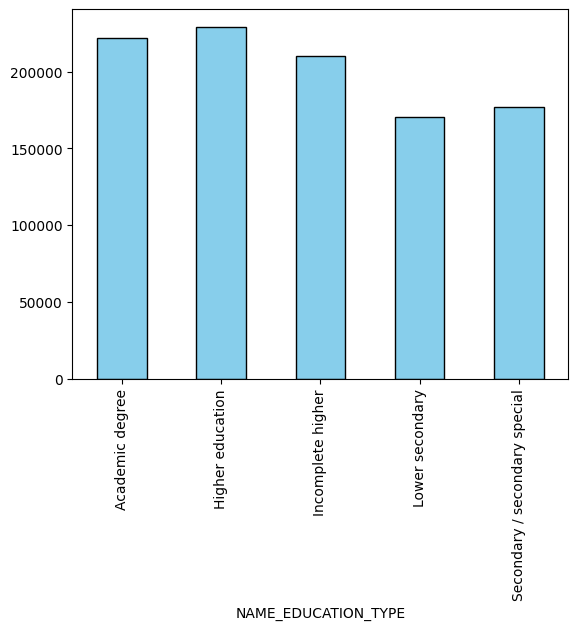

In [29]:
media_renda_por_estudo.plot(kind='bar', color='skyblue', edgecolor='black') #gráfico dessa média

# Predição em relação aos tipos de consumidores, se são bons ou ruins.

In [33]:
# criar a variável alvo 'good_bad_consumer'
# aqui, vamos considerar que consumidores com renda anual acima de 50,000 são 'bons' e abaixo são 'ruins'
df['good_bad_consumer'] = df['AMT_INCOME_TOTAL'].apply(lambda x: 1 if x > 50000 else 0)

In [34]:
# selecionar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(columns=['ID', 'AMT_INCOME_TOTAL', 'good_bad_consumer'])
y = df['good_bad_consumer']

In [35]:
#dividindo o dataframe em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# lista das colunas numéricas e categóricas
numerical_features = ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                        'OCCUPATION_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

In [39]:
# pré-processamento das colunas numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [40]:
# pré-processamento das colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [41]:
# combinar transformações numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [42]:
# criar e treinar o modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [44]:
# treinar o modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN', 'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'CNT_FAM_MEMBERS']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'FLAG_MOBIL',
                                                   'FLAG_WORK_PHONE',
                                                   'FLAG_PHONE',
                                                   'FLAG_EMAIL'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [45]:
# fazer previsões
y_pred = model.predict(X_test)

In [46]:
# avaliar o modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        71
           1       1.00      1.00      1.00     18567

    accuracy                           1.00     18638
   macro avg       0.99      0.94      0.97     18638
weighted avg       1.00      1.00      1.00     18638

[[   63     8]
 [    1 18566]]
ROC AUC Score: 0.9436350423324132


**Desempenho Geral:**

O modelo tem um nível de exatidão muito alta (100%), o que é excelente. A precisão, revocação e F1-score são muito altos, especialmente para a classe 1 (consumidores bons).

**Desequilíbrio de Classes:**

Há um grande desequilíbrio nas classes (71 para a classe 0 e 18567 para a classe 1).
Isso pode influenciar as métricas, especialmente a acurácia, pois o modelo pode estar muito inclinado a prever a classe majoritária (classe 1).


**Classe Minoritária (0):**

Embora a precisão seja alta (98%), a revocação é um pouco mais baixa (89%), indicando que o modelo perde algumas instâncias da classe 0 (8 falsos positivos).
O F1-score para a classe 0 é menor (93%), refletindo a menor revocação.


**Classe Majoritária (1):**

O modelo tem um desempenho perfeito para a classe 1 (100% em todas as métricas).

**AUC-ROC:**

Um valor de 0.9436 indica que o modelo tem uma excelente capacidade de distinguir entre as duas classes.